# Handling missing values

## Continous data Missing values

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ds_path = 'G:\Ashish Yadav\Backup Google Drive\Documents-Lecture\Github\Data-Science\Datasets'
ds = os.path.join(ds_path,'titanic.csv')
df = pd.read_csv(ds)

### MCAR (Missing Completely at Random):



Imagine you have a dataset, and some of the values are missing. If the missing values are completely random, meaning there's no particular pattern to why they are missing, and it's not related to the values of other variables, then you have Missing Completely at Random (MCAR).

In simple words, MCAR means that the likelihood of data being missing is the same for all observations, and it doesn't depend on the values that are missing or any other information in your dataset. It's like the missing values occurred randomly, and there's no systematic reason behind their absence.

For example, if people forget to answer survey questions randomly, without being influenced by the content of the questions or any personal characteristics, then the missing data can be considered MCAR.

Handling MCAR typically involves methods like filling in missing values with the mean or median, or using more advanced imputation techniques. Just remember, under MCAR, the missing data is like a random puzzle piece that got lost, and it doesn't tell us anything special about the data we have.

In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


### *MNAR (Missing Not at Random): systematic missing valueved data.

Imagine you have a dataset, and some values are missing. If the likelihood of data being missing depends on the unobserved values themselves, you might be dealing with Missing Not at Random (MNAR).

In simple terms, MNAR means that the reason for data being missing is related to the values that are missing. There's some pattern or correlation between the missing values and the actual values you're trying to measure.

For example, if in a health survey people with higher incomes are less likely to report their income accurately, then the income data becomes MNAR. The missing values are not random; they are influenced by the unobserved (true) income values.

Handling MNAR can be more challenging because the missing data is not just a random puzzle piece that got lost; it's missing for a reason that's related to what you're trying to measure. This may require more sophisticated modeling or imputation methods that take into account the potential relationships between the missing values and the observed data.

In [5]:
# where ever cabin value is null make it 1 else 0
# np.where(condition, true statement, false statement)
df['Cabin_null'] = np.where(df['Cabin'].isnull(),1,0)

In [6]:
# percentage of null values
df['Cabin_null'].mean()

0.7710437710437711

In [7]:
# out of survived 60% of them have cabin as null
# out of not survived 87% of them have cabin as null
df.groupby(['Survived'])['Cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_null, dtype: float64

### MAR (Missing at Random)



Imagine you have a dataset, and some values are missing. If the likelihood of data being missing depends only on the observed values and not on the unobserved values, you might be dealing with Missing at Random (MAR).

In simple terms, MAR means that the missing values are not related to the values that are missing but are related to the observed values in your dataset. There's a systematic pattern to why certain values are missing, but this pattern is determined by the observed data, not the unobserved data.

For example, in a survey, if men are less likely to report their weight than women, but this tendency is unrelated to the actual (unobserved) weight, then the missing weight data is MAR. The missingness is related to gender, which is observed, not directly to the weight, which is unobserved.

Handling MAR is more feasible than handling MNAR (Missing Not at Random) because the missingness is related to observed variables, making it possible to account for the missingness during analysis using appropriate statistical methods. Imputation methods based on observed variables can be used to handle missing data under the MAR a

**Methods to Handle them**
* Mean, median, mode
* random sample imputation
* capturing nan values with a new feature
* end of distribution imputation
* arbitrary imputation
* frequent categories imputation


1. **Mean, Median, Mode Imputation:**
   - **Method:** Replace missing values with the mean (for numerical data), median (for skewed or non-normally distributed numerical data), or mode (for categorical data).
   - **Use Case:** Appropriate for handling missing data under MCAR or MAR assumptions.

2. **Random Sample Imputation:**
   - **Method:** Randomly select values from the observed data to replace missing values.
   - **Use Case:** Suitable for situations where missingness is assumed to be completely random (MCAR), introducing randomness to avoid bias.

3. **Capturing NaN Values with a New Feature:**
   - **Method:** Create a new binary feature indicating whether a value is missing (1) or not (0).
   - **Use Case:** Useful when the fact that a value is missing might carry information; allows models to learn patterns related to missingness.

4. **End of Distribution Imputation:**
   - **Method:** Replace missing values with values located at the end of the distribution of observed values.
   - **Use Case:** Suitable when missing values are assumed to be at the end of the distribution; useful for handling outliers and skewed distributions.

5. **Arbitrary Imputation:**
   - **Method:** Replace missing values with a predetermined constant or arbitrary value.
   - **Use Case:** Appropriate when you want to explicitly mark imputed values; use with caution, as it can introduce bias.

6. **Frequent Categories Imputation:**
   - **Method:** Replace missing categorical values with the most frequent category.
   - **Use Case:** Suitable for handling missing values in categorical variables, assuming missingness is at random or related to the most common category.

These methods offer different approaches to handling missing data, and the choice depends on the characteristics of your data and the assumptions you can reasonably make about the missingness mechanism. Always assess the impact of imputation on the validity of your analysis.ssumption.

In [8]:
df = pd.read_csv(ds,usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [9]:
# percentage of null of value in each column
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [10]:
def impute_nan(df,var):
    median = df[var].median()
    df[var+'median'] = df[var].fillna(median)

In [11]:
impute_nan(df,'Age')

In [12]:
df.head()

,Survived,Age,Fare,Agemedian
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [13]:
# standard deviation of age and median col
print(df['Age'].std())
print(df['Agemedian'].std())

14.526497332334042
13.019696550973201


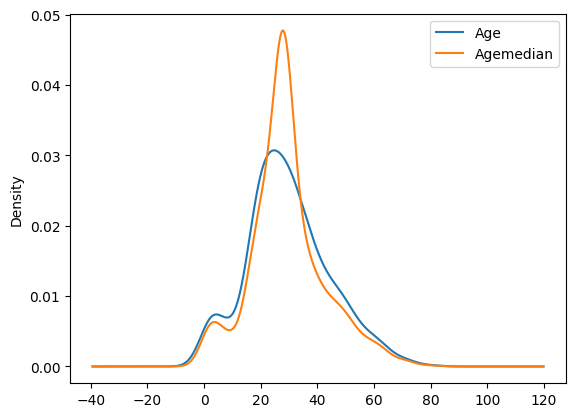

In [14]:
df['Age'].plot(kind='kde',label='Age')
df['Agemedian'].plot(kind='kde',label='Agemedian')
plt.legend()
plt.show()

**Pros:**
* easy to implement
* robust to outliers (median)

**Cons:**
* may change original variance

### Random Sample Imputation, used when MCAR

Imagine you have a dataset, and some values are missing. With random sample imputation, you randomly pick values from the observed (non-missing) data and use them to replace the missing values.

In simpler terms, it's like having a jar of marbles where each marble represents a valid data point. If some marbles are missing, you randomly draw marbles from the jar to replace the missing ones. This introduces a bit of randomness and helps maintain the overall characteristics of your dataset.

For example, if you're missing people's ages in a survey, you might randomly pick ages from the known ages to fill in the missing ones. This assumes that the ages you're missing are similar to the ages you already have, preserving the overall age distribution in your data.

Random sample imputation is used when you believe that the missing values are scattered randomly and drawing from the observed data is a reasonable way to replace them.

In [15]:
df = pd.read_csv(ds,usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [16]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [17]:
# selecting random non null value
# get randomly 177 (all null value count) non null values for imputation
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [18]:
def impute_nan(df,var):
    median = df[var].median()
    df[var+'median'] = df[var].fillna(median)
    df[var+'_random'] = df[var]
    random_sample = df[var].dropna().sample(df[var].isnull().sum(),random_state=2)
    random_sample.index = df[df[var].isnull()].index
    df.loc[df[var].isnull(),var+'_random'] = random_sample

In [19]:
impute_nan(df,'Age')

In [20]:
df.sample(5)

,Survived,Age,Fare,Agemedian,Age_random
473,1,23.0,13.7917,23.0,23.0
590,0,35.0,7.1250,35.0,35.0
299,1,50.0,247.5208,50.0,50.0
581,1,39.0,110.8833,39.0,39.0
754,1,48.0,65.0000,48.0,48.0


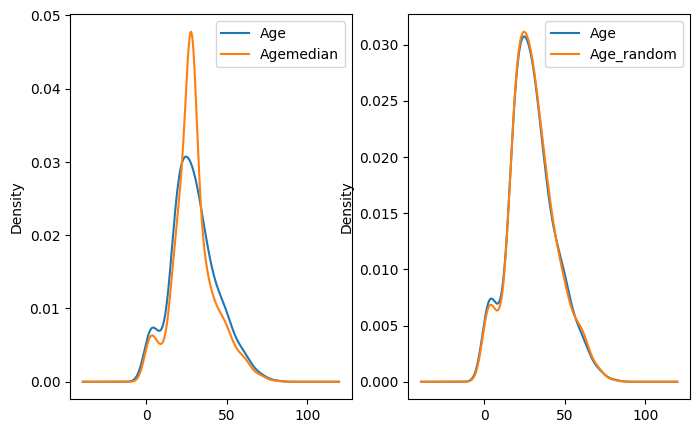

In [21]:
plt.figure(figsize=(8,5))

plt.subplot(1,2,1)
df['Age'].plot(kind='kde',label='Age')
df['Agemedian'].plot(kind='kde',label='Agemedian')
plt.legend(loc='best')

plt.subplot(1,2,2)
df['Age'].plot(kind='kde',label='Age')
df['Age_random'].plot(kind='kde',label='Age_random')
plt.legend(loc='best')

plt.show()

**Pros:**
* less change in original variance, less in  distortion variance
* easy to implement

**Cons:**
* every situation randomness won't work

### Capturing NaN Values with a New Feature:

`works well if the data are not missing completely at random MNAR`*

Imagine you have a dataset, and some values are missing (NaN). Instead of filling in the missing values right away, you create a new column (feature) that acts as a "flag" or indicator. This new column takes a value of 1 if the original value is missing (NaN) and 0 if the original value is present.

In simpler terms, it's like creating a special signpost for every missing value. If a piece of information is missing, you put up a sign (1) in the new column; if the information is there, no sign is needed (0).

For example, if you have a survey where some people didn't provide their income, you create a new column called "Income_Missing." For each person with a missing income, you put a 1 in the "Income_Missing" column; for those with reported incomes, you put a 0.

This method allows you to keep track of which values were missing in the original dataset. It can be useful because sometimes the fact that data is missing can itself be important information for analysis or modeling.

In [22]:
df = pd.read_csv(ds,usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [23]:
df['Age_nan'] = np.where(df['Age'].isnull(),1,0)
df['Age_nan'].mean()

0.19865319865319866

In [24]:
df.Age.median()

28.0

In [25]:
df.Age.fillna(df.Age.median(),inplace=True)

In [26]:
# extra column Age_nan is created to give information to the model about missing values
df.head(50)

,Survived,Age,Fare,Age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


**Pros:**
* easy to implement
* captures importance of missing values

**Cons:**
* increases the dimensionality

### End-of-Distribution Imputation

Imagine you have a dataset with some missing values, and you want to fill in those gaps. With end-of-distribution imputation, you replace the missing values with new values that are located at the end of the observed values in your dataset.

In simpler terms, it's like looking at the values you have and finding the one at the extreme end, and then using that value to fill in the missing spots.

For example, if you have a list of exam scores and some are missing, you might find the highest score in the class and use that as the value to fill in the missing scores. This assumes that the missing scores are likely to be on the higher end of the distribution.

End-of-distribution imputation is useful when you think the missing values are likely to be outliers or extreme values. It's a way of making an educated guess based on the extreme values already present in your data.

In [27]:
df = pd.read_csv(ds,usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


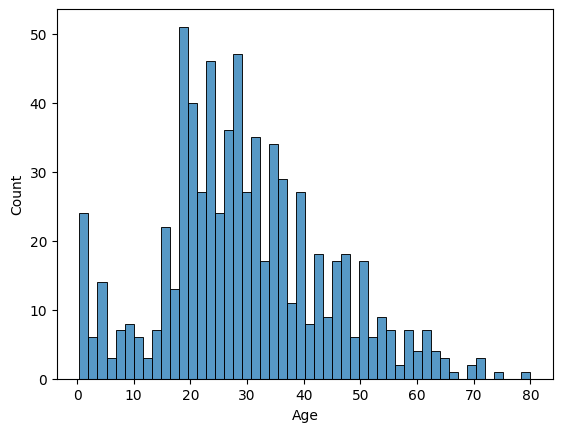

In [28]:
sns.histplot(df['Age'],bins=50)
plt.show()

In [29]:
age_mean = df.Age.mean()
age_mean

29.69911764705882

![image](https://www.simplypsychology.org/wp-content/uploads/normal-distribution-1024x640.jpeg)

In [30]:
# take 3rd standard deviation from mean
extreme = age_mean+3*df.Age.std()

<Axes: >

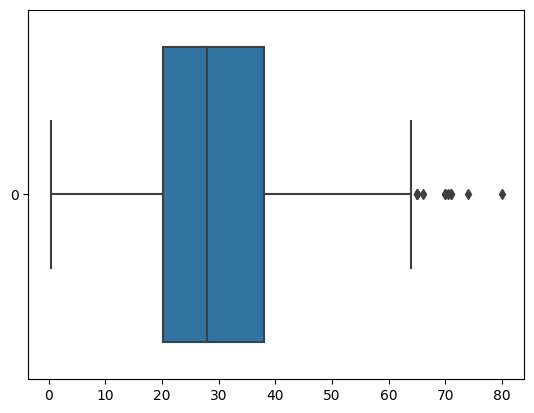

In [31]:
sns.boxplot(df.Age,orient='h')

In [32]:
def impute_nan(df,var,extreme):
    median = df[var].median()
    df[var+'_end_distribution'] = df[var].fillna(extreme)
    df[var].fillna(median,inplace=True)

In [33]:
impute_nan(df,'Age',extreme)

In [34]:
df.sample(5)

,Survived,Age,Fare,Age_end_distribution
574,0,16.0,8.0500,16.00000
438,0,64.0,263.0000,64.00000
385,0,18.0,73.5000,18.00000
849,1,28.0,89.1042,73.27861
399,1,28.0,12.6500,28.00000


<Axes: xlabel='Age', ylabel='Count'>

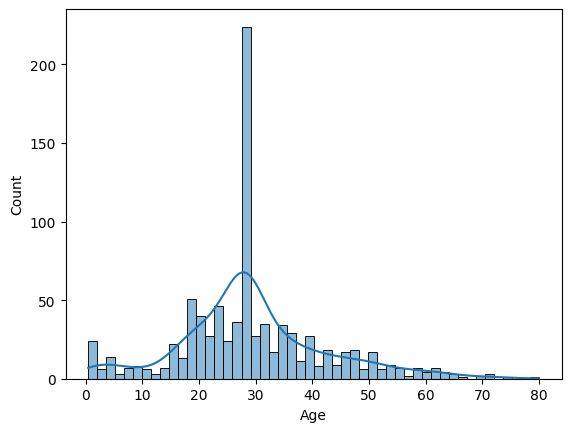

In [35]:
sns.histplot(df.Age,bins=50,kde=True)
# creates large variance in the dataset

<Axes: xlabel='Age_end_distribution', ylabel='Count'>

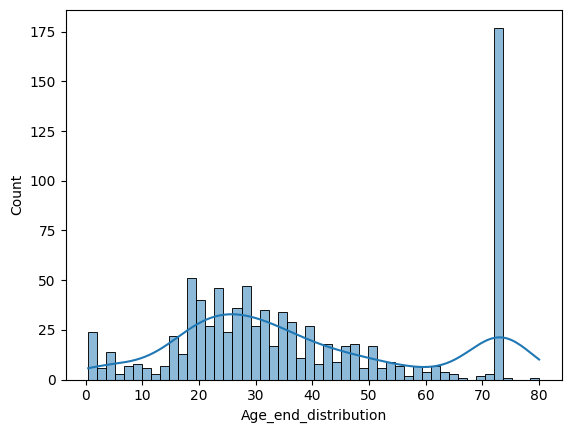

In [36]:
sns.histplot(df.Age_end_distribution,bins=50,kde=True)

<Axes: >

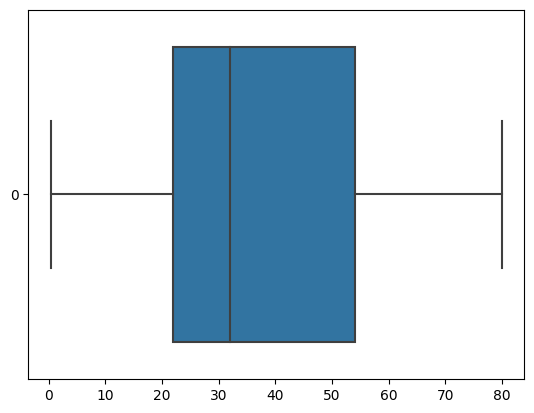

In [37]:
sns.boxplot(df.Age_end_distribution,orient='h')
# outliers are not present

**Pros:**
* easy to implement
* captures the importane of missingness if there is one

**Cons:**
* distorts original dist
* if missingness is not imp then it may mask predictive power of variable
* if count of NA is large it will mask true outliers
* if count of NA is small then imputed NA will be considered as outlier and may removed in subsequent process

#### Arbitrary value imputation

 Arbitrary value imputation is a method used in data analysis and statistics to fill in missing values in a dataset with arbitrary, pre-defined numbers. Instead of using a sophisticated method to estimate the missing values based on the available data, arbitrary value imputation involves inserting predetermined or random values in place of the missing ones. This approach is often used when a quick and simple solution is needed, but it may not accurately reflect the actual missing values in the dataset.

* It should be frequent element

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv(ds,usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [40]:
def impute_nan(df,var):
    df[var+'_new'] = df[var].fillna(100)

In [41]:
impute_nan(df,'Age')

## Categorical Missing Values

### Frequent category imputation

Frequent category imputation is a way to fill in missing values in a dataset by replacing them with the most common (or frequent) category in a categorical variable. In other words, if there are missing values in a categorical column, you replace those missing values with the category that appears most frequently in that column. This method is a simple and quick way to handle missing categorical data by essentially saying, "If I don't know the category, I'll assume it's the one I see most often in the dataset."

In [42]:
path = os.path.join('G:\Ashish Yadav\Backup Google Drive\Documents-Lecture\Github\Data-Science\Datasets')
df = pd.read_csv(os.path.join(path,'house_prices.csv'),usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [43]:
# percentage of missing values
df.isnull().sum().apply(lambda x: round(x/df.shape[0]*100,3))

BsmtQual        2.534
FireplaceQu    47.260
GarageType      5.548
SalePrice       0.000
dtype: float64

In [44]:
df.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
GarageType     0.055479
SalePrice      0.000000
dtype: float64

<Axes: xlabel='BsmtQual'>

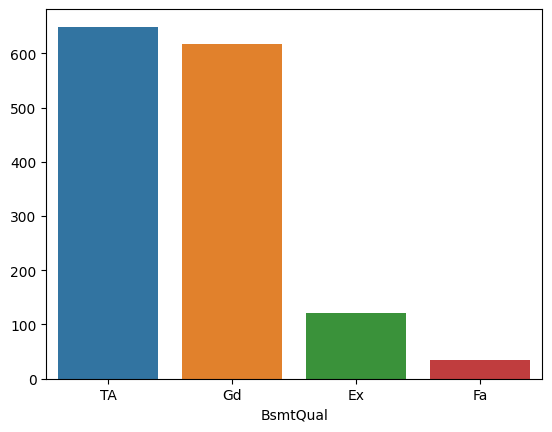

In [45]:
sns.barplot(x=df['BsmtQual'].value_counts().index,y=df['BsmtQual'].value_counts().values)

<Axes: xlabel='FireplaceQu'>

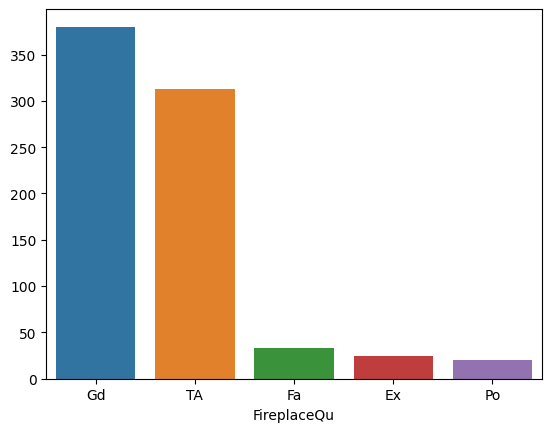

In [46]:
sns.barplot(x=df['FireplaceQu'].value_counts().index,y=df['FireplaceQu'].value_counts().values)

<Axes: xlabel='GarageType'>

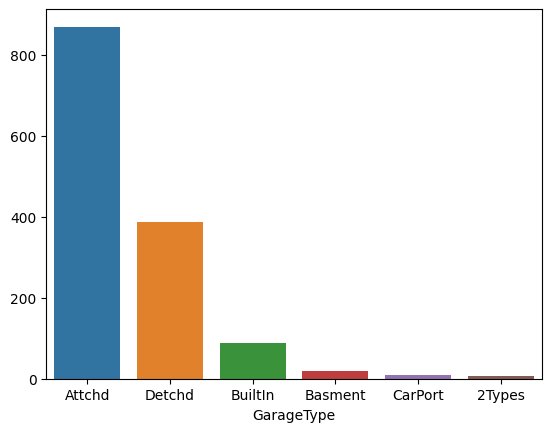

In [47]:
sns.barplot(x=df['GarageType'].value_counts().index,y=df['GarageType'].value_counts().values)

In [48]:
def impute_nan(df,var):
    mode = df[var].mode()[0]
    df[var].fillna(mode,inplace=True)

In [49]:
impute_nan(df,'GarageType')
impute_nan(df,'FireplaceQu')
impute_nan(df,'BsmtQual')

In [50]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

### Capturing NaN Values with a New Feature



Imagine you have a dataset, and some values are missing (NaN). Instead of filling in the missing values right away, you create a new column (feature) that acts as a "flag" or indicator. This new column takes a value of 1 if the original value is missing (NaN) and 0 if the original value is present.

In simpler terms, it's like creating a special signpost for every missing value. If a piece of information is missing, you put up a sign (1) in the new column; if the information is there, no sign is needed (0).

For example, if you have a survey where some people didn't provide their income, you create a new column called "Income_Missing." For each person with a missing income, you put a 1 in the "Income_Missing" column; for those with reported incomes, you put a 0.

This method allows you to keep track of which values were missing in the original dataset. It can be useful because sometimes the fact that data is missing can itself be important information for analysis or modeling.

In [51]:
path = os.path.join('G:\Ashish Yadav\Backup Google Drive\Documents-Lecture\Github\Data-Science\Datasets')
df = pd.read_csv(os.path.join(path,'house_prices.csv'),usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [52]:
def impute_nan(df,var):
    df[var+'_nan'] = np.where(df[var].isnull(),1,0)
    mode = df[var].mode()[0]
    df[var].fillna(mode,inplace=True)

In [53]:
impute_nan(df,'BsmtQual')

In [54]:
impute_nan(df,'FireplaceQu')

In [55]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_nan,FireplaceQu_nan
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


### When there are many frequent categories replacing NAN with new category

In [56]:
path = os.path.join('G:\Ashish Yadav\Backup Google Drive\Documents-Lecture\Github\Data-Science\Datasets')
df = pd.read_csv(os.path.join(path,'house_prices.csv'),usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [57]:
def impute_nan(df,var):
    df[var+'_nan'] = np.where(df[var].isnull(),'Missing',df[var])

In [58]:
impute_nan(df,'FireplaceQu')

In [59]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,FireplaceQu_nan
0,Gd,NaN,Attchd,208500,Missing
1,Gd,TA,Attchd,181500,TA
2,Gd,TA,Attchd,223500,TA
3,TA,Gd,Detchd,140000,Gd
4,Gd,TA,Attchd,250000,TA


## Handling categorical features

### Categorical variables with 2 categories

In [60]:
path = os.path.join('G:\Ashish Yadav\Backup Google Drive\Documents-Lecture\Github\Data-Science\Datasets')
df = pd.read_csv(os.path.join(path,'titanic.csv'),usecols=['Sex'])
df.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [61]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [62]:
ohe = OneHotEncoder(sparse_output=False)

In [63]:
new_df = pd.DataFrame(ohe.fit_transform(df),columns=[np.unique(df['Sex'])])

In [64]:
new_df

,female,male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
886,0.0,1.0
887,1.0,0.0
888,1.0,0.0
889,0.0,1.0


In [65]:
df = pd.concat([df,new_df],axis=1)

In [66]:
df.head()

,Sex,"(female,)","(male,)"
0,male,0.0,1.0
1,female,1.0,0.0
2,female,1.0,0.0
3,female,1.0,0.0
4,male,0.0,1.0


### Categorical features with multiple categories
### Replacing by top 10 features

In [67]:
path = os.path.join('G:\Ashish Yadav\Backup Google Drive\Documents-Lecture\Github\Data-Science\Datasets')
df = pd.read_csv(os.path.join(path,'mercedes.csv'),usecols=['X0','X1'])
df.head()

,X0,X1
0,k,v
1,k,t
2,az,w
3,az,t
4,az,v


In [68]:
lst_10 = list(df['X1'].value_counts()[:10].index)

In [69]:
lst_10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [70]:
for category in lst_10:
    df['X1_'+category] = np.where(df['X1']==category,1,0)

In [71]:
df.sample(5)

,X0,X1,X1_aa,X1_s,X1_b,X1_l,X1_v,X1_r,X1_i,X1_a,X1_c,X1_o
2364,e,s,0,1,0,0,0,0,0,0,0,0
28,f,s,0,1,0,0,0,0,0,0,0,0
105,x,r,0,0,0,0,0,1,0,0,0,0
141,j,aa,1,0,0,0,0,0,0,0,0,0
364,f,s,0,1,0,0,0,0,0,0,0,0


## Ordinal number encoding

### Simple encoding

In [72]:
path = os.path.join('G:\Ashish Yadav\Backup Google Drive\Documents-Lecture\Github\Data-Science\Datasets')
df = pd.read_csv(os.path.join(path,'titanic.csv'))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [73]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [74]:
from sklearn.preprocessing import LabelEncoder

In [75]:
label = LabelEncoder()

In [76]:
df['Embarked_new'] = label.fit_transform(df['Embarked'])

### Count of Frequency encoding

In [77]:
path = os.path.join('G:\Ashish Yadav\Backup Google Drive\Documents-Lecture\Github\Data-Science\Datasets')
df = pd.read_csv(os.path.join(path,'mumbai.csv'),usecols=['Furnished_status','Status','neworold'])
df.head()

,Status,neworold,Furnished_status
0,Under Construction,New Property,NaN
1,Under Construction,New Property,NaN
2,Under Construction,New Property,NaN
3,Ready to Move,New Property,NaN
4,NaN,New Property,Unfurnished


In [78]:
df.columns

Index(['Status', 'neworold', 'Furnished_status'], dtype='object')

In [79]:
df['Status'].value_counts()

Status
Ready to Move         5771
Under Construction       3
Name: count, dtype: int64

In [80]:
df['Status'].shape[0]/df['Status'].isna().sum()

13.004158004158004

In [81]:
df['Status'].fillna(df['Status'].mode()[0],inplace=True)

In [82]:
d = df['Status'].value_counts().to_dict()

In [83]:
df['Status'] = df['Status'].map(d)

**Pros:**
* easy to use
* not increasing any feature space

**Cons:**
* it will provide same weight if the frequencies are same

### Target Guided Ordinal Encoding
* ordering the labels according to the target
* replace labels by the joint probability of being 1 or 0

In [13]:
path = os.path.join('G:\Ashish Yadav\Backup Google Drive\Documents-Lecture\Github\Data-Science\Datasets')
df = pd.read_csv(os.path.join(path,'titanic.csv'),usecols=['Cabin','Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [14]:
df['Cabin'].fillna('Missing',inplace=True)

In [15]:
df.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [16]:
df['Cabin'] = df['Cabin'].astype(str).str[0]

In [17]:
set(df['Cabin'])

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'M', 'T'}

In [18]:
labels = df.groupby(['Cabin'])['Survived'].mean().sort_values().index

In [19]:
df[df['Cabin']=='A']

,Survived,Cabin
23,1,A
96,0,A
174,0,A
185,0,A
209,1,A
284,0,A
445,1,A
475,0,A
556,1,A
583,0,A


In [9]:
mapping = { labels[i]: i for i in range(len(list(labels)))}
mapping

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [10]:
df['Cabin'] = df['Cabin'].map(mapping)

### Mean encoding

In [92]:
path = os.path.join('G:\Ashish Yadav\Backup Google Drive\Documents-Lecture\Github\Data-Science\Datasets')
df = pd.read_csv(os.path.join(path,'titanic.csv'),usecols=['Cabin','Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [93]:
df['Cabin'].fillna('Missing',inplace=True)

In [94]:
df['Cabin'] = df['Cabin'].astype(str).str[0]

In [95]:
labels_mapping = df.groupby(['Cabin'])['Survived'].mean().to_dict()
labels_mapping

{'A': 0.4666666666666667,
 'B': 0.7446808510638298,
 'C': 0.5932203389830508,
 'D': 0.7575757575757576,
 'E': 0.75,
 'F': 0.6153846153846154,
 'G': 0.5,
 'M': 0.29985443959243085,
 'T': 0.0}

In [96]:
df['Cabin'] = df['Cabin'].map(labels_mapping)

In [97]:
df.head()

,Survived,Cabin
0,0,0.299854
1,1,0.593220
2,1,0.299854
3,1,0.593220
4,0,0.299854


### Probability ratio encoding

In [98]:
path = os.path.join('G:\Ashish Yadav\Backup Google Drive\Documents-Lecture\Github\Data-Science\Datasets')
df = pd.read_csv(os.path.join(path,'titanic.csv'),usecols=['Cabin','Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [99]:
df['Cabin'].fillna('Missing',inplace=True)

In [100]:
df['Cabin'].unique()

array(['Missing', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [102]:
df['Cabin'] = df['Cabin'].apply(lambda x: x[0])

In [105]:
df.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [109]:
##find the percentage of the survived based on cabin
prob_df = df.groupby(['Cabin'])['Survived'].mean()

In [111]:
prob_df = pd.DataFrame(prob_df)
prob_df

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
M,0.299854
T,0.000000


In [112]:
prob_df['died'] = 1-prob_df['Survived']
prob_df

,Survived,died
Cabin,,
A,0.466667,0.533333
B,0.744681,0.255319
C,0.593220,0.406780
D,0.757576,0.242424
E,0.750000,0.250000
F,0.615385,0.384615
G,0.500000,0.500000
M,0.299854,0.700146
T,0.000000,1.000000


In [113]:
#probability of survived/died
prob_df['ratio'] = prob_df['Survived']/prob_df['died']
prob_df

,Survived,died,ratio
Cabin,,,
A,0.466667,0.533333,0.875000
B,0.744681,0.255319,2.916667
C,0.593220,0.406780,1.458333
D,0.757576,0.242424,3.125000
E,0.750000,0.250000,3.000000
F,0.615385,0.384615,1.600000
G,0.500000,0.500000,1.000000
M,0.299854,0.700146,0.428274
T,0.000000,1.000000,0.000000


In [116]:
prob_dict = {prob_df.index[i]: prob_df.iloc[i,-1] for i in range(prob_df.shape[0])}

In [117]:
prob_dict

{'A': 0.875,
 'B': 2.916666666666666,
 'C': 1.4583333333333333,
 'D': 3.125,
 'E': 3.0,
 'F': 1.6000000000000003,
 'G': 1.0,
 'M': 0.42827442827442824,
 'T': 0.0}

In [118]:
df['Cabin'] = df['Cabin'].map(prob_dict)

In [119]:
df.head()

,Survived,Cabin
0,0,0.428274
1,1,1.458333
2,1,0.428274
3,1,1.458333
4,0,0.428274
